In [6]:
from datascience import *
import numpy as np
%matplotlib inline

# Getting the data
---

This data was compiled from a number of queries from the NOAA (National Oceanic and Atmospheric Administration) website.

NOAA National Centers for Environmental information, Climate at a Glance: Regional Time Series, published October 2018, retrieved on October 18, 2018 from https://www.ncdc.noaa.gov/cag/

In [7]:
temps = Table.read_table("temperatures.csv")
temps

Year,Month,Region,Average Temperature
2000,1,Northeast Climate Region,21.4
2000,2,Northeast Climate Region,27.2
2000,3,Northeast Climate Region,39.1
2000,4,Northeast Climate Region,44.2
2000,5,Northeast Climate Region,56.6
2000,6,Northeast Climate Region,64.5
2000,7,Northeast Climate Region,65.8
2000,8,Northeast Climate Region,66.2
2000,9,Northeast Climate Region,58.9
2000,10,Northeast Climate Region,49.5


It contains a `Year` (2000 to 2018), `Month` (1 to 12), `Region` (a climate region), and `Average Temperature` (the average temperature for that year/month/region in degrees Farenheit).

# Let's go over some basics of `where`, `group`, columns on this dataset
---

By getting familiar with our dataset, it should be easier for us to answer questions we have a bit later.

Recall the syntax of the following functions:

`table.where ( column_label, are.predicate( value ) ) => copy of table with only rows satisfying condition`

`table.group ( column_label, method ) => copy of table with only unique rows from column_label and values calculated by the method, default is count`

`table.column ( column_label ) => an array of the column specified`

`table.with_column ( column_label, array_values ) => copy of table with a new column named column_label and values from the array_values`

In [ ]:
# If we need any more information, we can always use help
help

In [8]:
# As a helping hand to get started, let's find out what regions we have
np.unique(temps.column("Region"))

array(['Northeast Climate Region',
       'Northern Rockies and Plains Climate Region',
       'Northwest Climate Region', 'Ohio Valley Climate Region',
       'South Climate Region', 'Southeast Climate Region',
       'Southwest Climate Region', 'Upper Midwest Climate Region',
       'West Climate Region'], dtype='<U42')

In [9]:
region_names = np.unique(temps.column("Region"))
for region in region_names:
    print(region)

Northeast Climate Region
Northern Rockies and Plains Climate Region
Northwest Climate Region
Ohio Valley Climate Region
South Climate Region
Southeast Climate Region
Southwest Climate Region
Upper Midwest Climate Region
West Climate Region


# Play around with the dataset using `where`, `group`, etc
---

In [12]:
region_names

array(['Northeast Climate Region',
       'Northern Rockies and Plains Climate Region',
       'Northwest Climate Region', 'Ohio Valley Climate Region',
       'South Climate Region', 'Southeast Climate Region',
       'Southwest Climate Region', 'Upper Midwest Climate Region',
       'West Climate Region'], dtype='<U42')

In [13]:
# Maybe find the data for just one region
temps.where("Region", are.containing("Ohio"))

Year,Month,Region,Average Temperature
2000,1,Ohio Valley Climate Region,30.8
2000,2,Ohio Valley Climate Region,40.1
2000,3,Ohio Valley Climate Region,47.7
2000,4,Ohio Valley Climate Region,52.6
2000,5,Ohio Valley Climate Region,65.8
2000,6,Ohio Valley Climate Region,71.3
2000,7,Ohio Valley Climate Region,73.6
2000,8,Ohio Valley Climate Region,74.7
2000,9,Ohio Valley Climate Region,66.6
2000,10,Ohio Valley Climate Region,58.5


In [16]:
# Maybe find the average temperature for each region
temps.group("Region", np.mean)

Region,Year mean,Month mean,Average Temperature mean
Northeast Climate Region,2008.88,6.44,47.4236
Northern Rockies and Plains Climate Region,2008.88,6.44,44.3791
Northwest Climate Region,2008.88,6.44,46.6302
Ohio Valley Climate Region,2008.88,6.44,54.6213
South Climate Region,2008.88,6.44,63.416
Southeast Climate Region,2008.88,6.44,63.6053
Southwest Climate Region,2008.88,6.44,53.6453
Upper Midwest Climate Region,2008.88,6.44,44.9018
West Climate Region,2008.88,6.44,56.1009


In [20]:
# Maybe find the average temperature for each year
temps.group("Year", np.mean)

Year,Month mean,Region mean,Average Temperature mean
2000,6.5,,52.2444
2001,6.5,,52.8194
2002,6.5,,52.4222
2003,6.5,,52.2963
2004,6.5,,52.1954
2005,6.5,,52.6954
2006,6.5,,53.3278
2007,6.5,,52.7694
2008,6.5,,51.4296
2009,6.5,,51.4954


In [21]:
# Maybe find the average temperature for each year for just one region
temps.where("Region", are.containing("Ohio")).group("Year", np.mean)

Year,Month mean,Region mean,Average Temperature mean
2000,6.5,,53.8083
2001,6.5,,54.775
2002,6.5,,54.7917
2003,6.5,,53.3083
2004,6.5,,54.2
2005,6.5,,54.925
2006,6.5,,55.3417
2007,6.5,,55.3417
2008,6.5,,53.025
2009,6.5,,53.2417


In [ ]:
# Maybe find the average temperature for each month

In [ ]:
# Maybe find the average temperature for any region containing "North" versus containing "South"

# Let's look at trends over time
---
What's a good way to represent this data?

How does temperature change over the course of a year?  What about two years?

How does temperature change over the course of 18 years?

In [ ]:
























# Maybe a line plot :) 

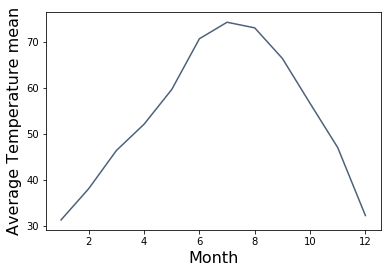

In [26]:
# Plot against month for a given year
temps.where(
    "Year", 2016
).group(
    "Month", np.mean
).plot("Month", "Average Temperature mean")

In [28]:
# Plot against month for a range of two years
temps.where("Year", are.between(2016, 2018)).group("Month", np.mean)

Month,Year mean,Region mean,Average Temperature mean
1,2016.5,,32.0389
2,2016.5,,39.0056
3,2016.5,,45.35
4,2016.5,,52.5278
5,2016.5,,59.6889
6,2016.5,,70.0278
7,2016.5,,74.5111
8,2016.5,,72.2056
9,2016.5,,66.0222
10,2016.5,,55.9556


In [ ]:





















# Uh oh!
# We need some way to distinguish the months in one year from another year

In [ ]:



















# Maybe give apply a shot

# Recall the syntax of `apply`
---

`table.apply ( method, column_name, column_name, ... ) => returns an array of the method applied to the values in the specified columns`

In [29]:
help(Table.apply)

Help on function apply in module datascience.tables:

apply(self, fn, *column_or_columns)
    Apply ``fn`` to each element or elements of ``column_or_columns``.
    If no ``column_or_columns`` provided, `fn`` is applied to each row.
    
    Args:
        ``fn`` (function) -- The function to apply.
        ``column_or_columns``: Columns containing the arguments to ``fn``
            as either column labels (``str``) or column indices (``int``).
            The number of columns must match the number of arguments
            that ``fn`` expects.
    
    Raises:
        ``ValueError`` -- if  ``column_label`` is not an existing
            column in the table.
        ``TypeError`` -- if insufficent number of ``column_label`` passed
            to ``fn``.
    
    Returns:
        An array consisting of results of applying ``fn`` to elements
        specified by ``column_label`` in each row.
    
    >>> t = Table().with_columns(
    ...     'letter', make_array('a', 'b', 'c', 'z'),
    

We should look at the [datetime.date documentation](https://docs.python.org/3.6/library/datetime.html#date-objects).

In [30]:
# Let's write a function to turn a year and month into a datetime that python can understand

import datetime

def make_date_from_year_month(year, month):
    return datetime.date(year, month, 1)

In [34]:
# Apply our function, what do we get?
dates = temps.apply(make_date_from_year_month, "Year", "Month")

In [36]:
# Okay, what can we do with that?
temps_with_dates = temps.with_column("Date", dates)
temps_with_dates

Year,Month,Region,Average Temperature,Date
2000,1,Northeast Climate Region,21.4,2000-01-01
2000,2,Northeast Climate Region,27.2,2000-02-01
2000,3,Northeast Climate Region,39.1,2000-03-01
2000,4,Northeast Climate Region,44.2,2000-04-01
2000,5,Northeast Climate Region,56.6,2000-05-01
2000,6,Northeast Climate Region,64.5,2000-06-01
2000,7,Northeast Climate Region,65.8,2000-07-01
2000,8,Northeast Climate Region,66.2,2000-08-01
2000,9,Northeast Climate Region,58.9,2000-09-01
2000,10,Northeast Climate Region,49.5,2000-10-01


# Let's finally plot monthly temperatures over multiple years
---

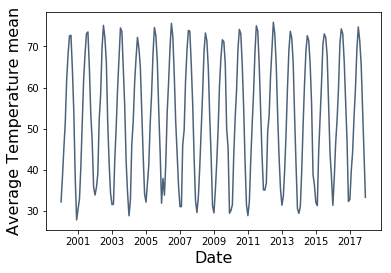

In [45]:
start_date = datetime.date(2000, 1, 1)
end_date = datetime.date(2018, 1, 1)

temps_with_dates.where(
    "Date", are.between(start_date, end_date)
).group("Date", np.mean).plot("Date", "Average Temperature mean")

In [ ]:
# Let's change the start date to look at the temperature from 2000 to 2018

# Alright, what about annual average temperature over time
---

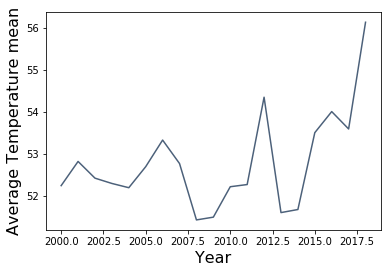

In [46]:
# Plot the annual average temperature versus year
temps.group("Year", np.mean).plot("Year", "Average Temperature mean")

What if I just wanted to look at West Climate Region?

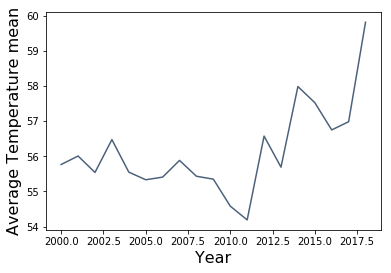

In [47]:
temps.where(
    "Region", are.containing("West")
).group(
    "Year", np.mean
).plot("Year", "Average Temperature mean")

In [ ]:
# Is there anything weird?

# Why?

# What does the distribution of ___ look like?
---

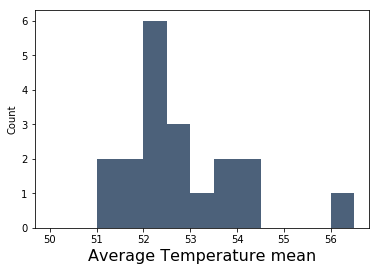

In [56]:
temps.group(
    "Year", np.mean
).hist(3, normed=False, bins=np.arange(50, 57, 0.5))

In [ ]:
# We can change "Year" and np.mean to a bunch of different stuff

# Make sure that we allow default bins if we don't fully know what we're working with

# Let's use normed=False to get counts instead of density--a little easier to understand

How many years had an average temperature greater than 54°F, using counts?

In [57]:
# How many years had an avg temp of > 54


2 + 1

3

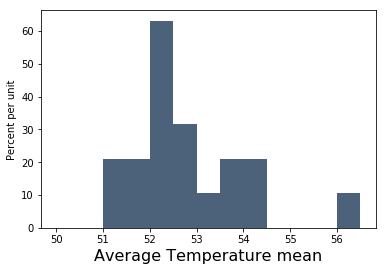

In [58]:
# Let's try the distribution of annual average temperatures
temps.group("Year", np.mean).hist(3, normed=True, bins=np.arange(50, 57, 0.5))

How many years had an average temperature greater than 54°F, using density?

In [59]:
# We need to know how many years we have
temps.group("Year", np.mean).num_rows

19

In [62]:
# We have 19 years
# How many years had an avg temp of > 54
(0.2 * 0.5 + 0.1 * 0.5) * 19

2.8500000000000005

# We want to compare annual average temperature accross multiple regions
---

There's an easy way and a hard way to go about this.

The way that we're most comfortable with starting is actually a bit more challenging... let's do it anyways

In [ ]:
# I want to compare Northeast to West

# What should my logic be to compare Annual Avg Temps for Northeast to those of West?





























# We've done this before for one region:

# Get data for just that region, then group by year

In [63]:
# Grab data for just northeast
northeast_data = temps.where("Region", are.containing("Northeast"))
northeast_data

Year,Month,Region,Average Temperature
2000,1,Northeast Climate Region,21.4
2000,2,Northeast Climate Region,27.2
2000,3,Northeast Climate Region,39.1
2000,4,Northeast Climate Region,44.2
2000,5,Northeast Climate Region,56.6
2000,6,Northeast Climate Region,64.5
2000,7,Northeast Climate Region,65.8
2000,8,Northeast Climate Region,66.2
2000,9,Northeast Climate Region,58.9
2000,10,Northeast Climate Region,49.5


In [64]:
# Grab data for just west
west_data = temps.where("Region", are.containing("West"))

In [65]:
# Group both by year
northeast_years = northeast_data.group("Year", np.mean)
west_years = west_data.group("Year", np.mean)

But now I have two separate tables.  We've only learned how to plot from one table so far.

We can use matplotlib to circumvent that (don't worry, you don't need to know how to do this)

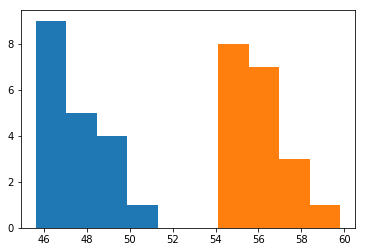

In [66]:
# Don't worry about this code too much.
import matplotlib.pyplot as plt

plt.hist(
    [northeast_years.column("Average Temperature mean"), west_years.column("Average Temperature mean")],
    histtype='stepfilled'
)
plt.show()

Or we can create a new table, add our columns to it, and then plot

In [68]:
# Create a new table with a column for Northeast and a column for West, and rows for every year
northeast_vs_west = Table().with_columns(
    "Northeast", northeast_years.column("Average Temperature mean"),
    "West", west_years.column("Average Temperature mean")
)
northeast_vs_west

Northeast,West
46.0333,55.7667
47.7167,56.0083
47.7083,55.5417
45.6083,56.475
46.275,55.55
47.1333,55.3333
48.6833,55.4083
46.7167,55.8833
46.85,55.4333
46.125,55.35


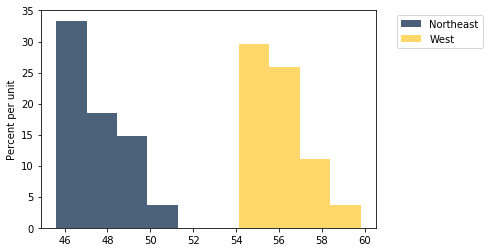

In [69]:
# We can histogram this table normally
northeast_vs_west.hist()

# There's an easier way
---

Using `table.pivot` we can essentially perform `.where`, `.group`, and `.column` for every region at once.

Let's delve into [the documentation](http://data8.org/datascience/_autosummary/datascience.tables.Table.pivot.html) to find out how to use this method.

In [73]:
# Before we use the method, we should think clearly about what we want to achieve
all_year_avgs = temps.pivot("Region", "Year", values="Average Temperature", collect=np.mean)
all_year_avgs

Year,Northeast Climate Region,Northern Rockies and Plains Climate Region,Northwest Climate Region,Ohio Valley Climate Region,South Climate Region,Southeast Climate Region,Southwest Climate Region,Upper Midwest Climate Region,West Climate Region
2000,46.0333,44.0417,45.9333,53.8083,63.4667,62.6667,53.9667,44.5167,55.7667
2001,47.7167,44.9333,46.325,54.775,63.1583,63.15,53.5667,45.7417,56.0083
2002,47.7083,43.55,45.9,54.7917,62.525,63.65,53.1,45.0333,55.5417
2003,45.6083,44.4,47.5583,53.3083,62.65,62.6167,54.1833,43.8667,56.475
2004,46.275,44.1083,47,54.2,62.7833,63.1667,52.5583,44.1167,55.55
2005,47.1333,44.8833,46.225,54.925,63.5,63.1667,53.4417,45.65,55.3333
2006,48.6833,45.7583,46.5583,55.3417,64.3667,63.7833,53.35,46.7,55.4083
2007,46.7167,44.9833,46.5083,55.3417,62.7583,64.1667,53.3833,45.1833,55.8833
2008,46.85,42.3833,45.075,53.025,62.4167,62.9417,52.3083,42.4333,55.4333
2009,46.125,42.1833,45.525,53.2417,62.575,62.8167,52.7333,42.9083,55.35


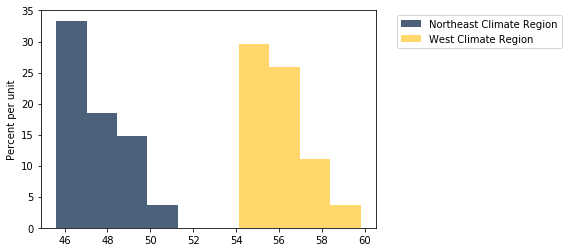

In [74]:
# Now let's compare West Climate Region to Northeast Climate Region
a = all_year_avgs
a.hist("Northeast Climate Region", "West Climate Region")

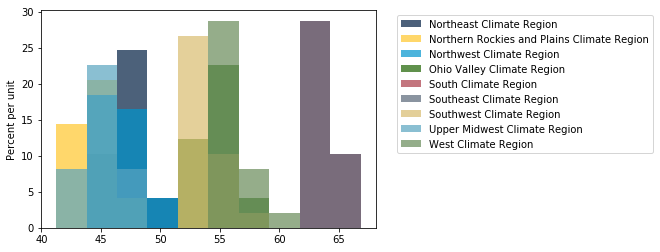

In [75]:
# We can even compare every region this way
a.hist(np.arange(1, 10))

# Let's finish with some knowledge about histograms
---

We might have some questions about these histograms, and we should figure out the answers!

Q. What do histograms measure?

Q. Why the histograms for some regions taller than others?

Q. What do we know is true for every region's histogram?

Q. If we change to density (`normed=False`) then does our previous answer change?

Q. How do we calculate the number of occurrences of a certain bin using counts (`normed=False`)?

Q. How do we calculate the number of occurrences of a certain bin using density?

In [ ]:
# PERCENT PER UNIT

# UNIT = BIN SIZE

# (% / Unit) * Unit => %
# % * population => count